<a href="https://colab.research.google.com/github/pedro-varela1/Lab_Com_Files/blob/main/filtros_LABCOM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtros com a função _butter_

## Filtro Passa-Baixa

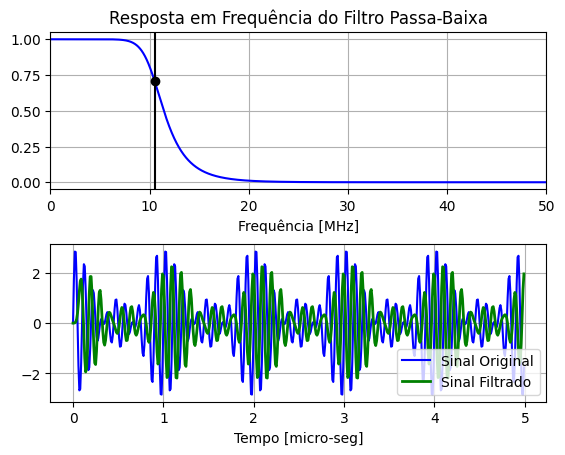

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 100.0       # sample rate, Hz
cutoff = 10.5  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Resposta em Frequência do Filtro Passa-Baixa")
plt.xlabel('Frequência [MHz]')
plt.grid()


T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(9*2*np.pi*t) + np.sin(10*2*np.pi*t) + np.sin(11*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='Sinal Original')
plt.plot(t, y, 'g-', linewidth=2, label='Sinal Filtrado')
plt.xlabel('Tempo [micro-seg]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

## Filtro Passa-Alta

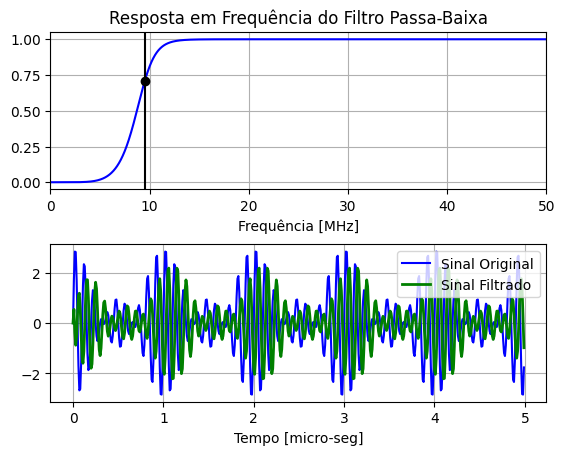

In [2]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='high', analog=False)

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


order = 6
fs = 100.0
cutoff = 9.5

b, a = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Resposta em Frequência do Filtro Passa-Baixa")
plt.xlabel('Frequência [MHz]')
plt.grid()


T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(9*2*np.pi*t) + np.sin(10*2*np.pi*t) + np.sin(11*2*np.pi*t)

y = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='Sinal Original')
plt.plot(t, y, 'g-', linewidth=2, label='Sinal Filtrado')
plt.xlabel('Tempo [micro-seg]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

## Filtro Passa-Faixa

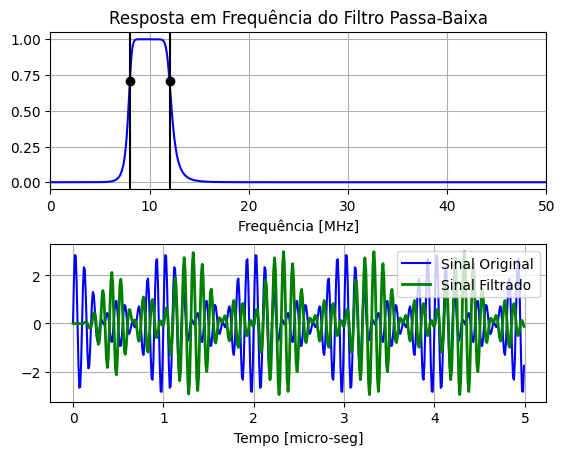

In [3]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_bandpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='bandpass', analog=False)

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 100.0       # sample rate, Hz
cutoff = [8, 12]

# Get the filter coefficients so we can check its frequency response.
b, a = butter_bandpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')

plt.plot(cutoff[0], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[0], color='k')

plt.plot(cutoff[1], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[1], color='k')

plt.xlim(0, 0.5*fs)
plt.title("Resposta em Frequência do Filtro Passa-Baixa")
plt.xlabel('Frequência [MHz]')
plt.grid()



T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(9*2*np.pi*t) + np.sin(10*2*np.pi*t) + np.sin(11*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_bandpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='Sinal Original')
plt.plot(t, y, 'g-', linewidth=2, label='Sinal Filtrado')
plt.xlabel('Tempo [micro-seg]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

## Filtro Rejeita-Faixa

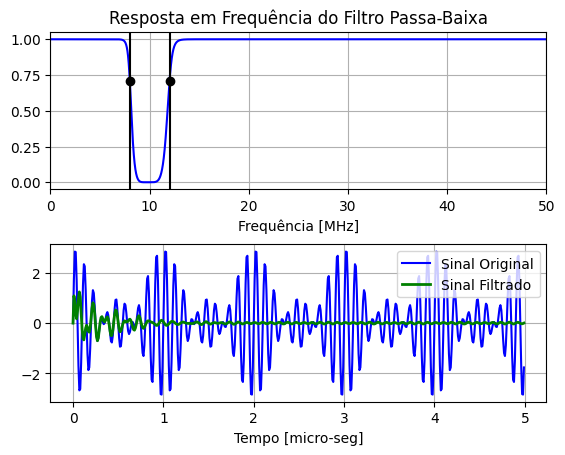

In [4]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_bandstop(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='bandstop', analog=False)

def butter_bandstop_filter(data, cutoff, fs, order=5):
    b, a = butter_bandstop(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 100.0       # sample rate, Hz
cutoff = [8, 12]

# Get the filter coefficients so we can check its frequency response.
b, a = butter_bandstop(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')

plt.plot(cutoff[0], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[0], color='k')

plt.plot(cutoff[1], 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff[1], color='k')

plt.xlim(0, 0.5*fs)
plt.title("Resposta em Frequência do Filtro Passa-Baixa")
plt.xlabel('Frequência [MHz]')
plt.grid()



T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(9*2*np.pi*t) + np.sin(10*2*np.pi*t) + np.sin(11*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_bandstop_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='Sinal Original')
plt.plot(t, y, 'g-', linewidth=2, label='Sinal Filtrado')
plt.xlabel('Tempo [micro-seg]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()